In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-6.23073202,  0.14480158],
       [ 8.57397565,  7.49977976],
       [-6.13994821, -7.52298272],
       ...,
       [-5.47067013, -6.62631391],
       [10.03152701,  5.99962991],
       [-5.7019741 ,  2.30370868]])

In [4]:
y

array([1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1,
       0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2,
       0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0,
       0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0,
       0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0,

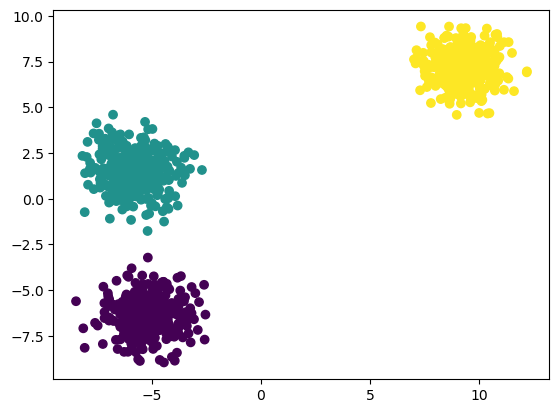

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Ignore: y_train, y_test as in real world scenario, we won't be having that.

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [12]:
wcss

[1340.000000000001,
 254.21022939258097,
 33.87087468465149,
 29.37455668040601,
 24.737375239918652,
 20.63086568103207,
 17.941519975885925,
 16.21157811817778,
 15.349586262759306,
 13.231630142984475]

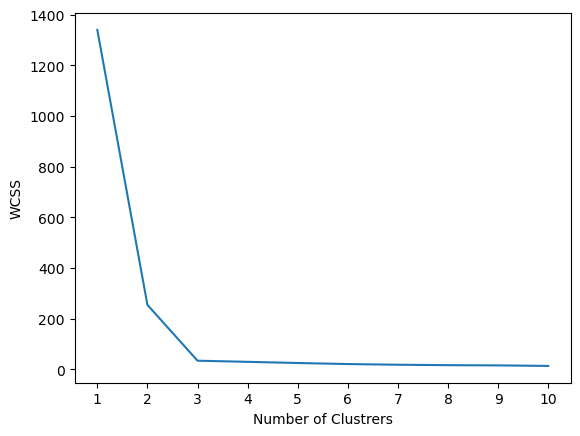

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [15]:
# From above curve we can see that at k=3 i.e. elbow point, we should cluster it 
kmeans=KMeans(n_clusters=3,init="k-means++") # means it will now create 3 centroids

In [16]:
kmeans.fit_predict(X_train_scaled)

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1,
       0, 2, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 2,
       2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0,
       1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0,
       0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1,

In [17]:
y_pred=kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1,
       0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1,
       1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1,
       2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1,

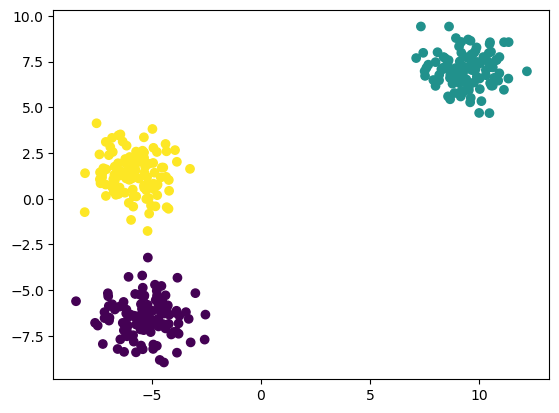

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
## Validating the k value, we have 2 more methods
# kneelocator
# Silhoutee scoring

In [21]:
## kneelocator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [28]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
# My above curve is kinda convex in shape, so curve = 'convex'. Refer convex and concave curve
# My above curve is decreasing so direction = 'decreasing'

In [29]:
kl.elbow # From below output, we can validate the elbow point value

3

In [30]:
## silhouette score
from sklearn.metrics import silhouette_score

In [34]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_) # we need to provide 2 parameters, ..., wrt kmeans what label we have got i.e to which cluster that specific datapoints belong to.
    print(kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[2 1 1 2 0 0 1 0 1 0 0 0 1 0 0 1 2 0 0 0 0 2 1 0 2 2 2 1 1 1 2 2 0 1 2 0 1
 2 0 0 1 0 1 1 2 0 2 1 1 0 1 2 0 0 2 0 1 0 2 0 0 2 1 2 2 1 2 1 0 2 1 1 2 2
 2 2 1 0 1 0 1 0 1 2 0 1 2 1 2 2 1 2 2 2 1 2 1 2 1 0 2 0 1 1 2 0 2 1 0 2 2
 1 1 1 2 1 1 1 0 1 1 0 1 2 2 1 0 2 0 1 0 0 0 1 2 0 2 1 2 1 1 0 0 0 2 1 2 0
 1 0 1 2 0 2 1 2 2 0 0 2 1 0 2 0 2 0 2 1 0 0 0 1 2 1 1 2 0 1 2 0 2 2 1 2 0
 0 0 0 2 2 1 2 1 1 1 2 2 1 0 0 0 1 1 1 0 2 1 0 1 1 2 2 0 0 1 1 2 1 1 1 2 1
 1 0 1 1 0 1 0 0 1 0 1 0 2 0 0 2 0 1 1 2 2 2 0 1 1 1 0 1 1 1 0 2 2 2 2 0 1
 1 2 1 2 0 1 2 0 0 1 1 2 1 1 2 0 1 1 1 0 0 0 2 1 1 0 2 1 1 2 0 1 0 2 1 0 0
 0 1 1 1 1 1 1 0 2 2 1 1 0 2 2 2 2 1 2 0 1 1 0 2 2 0 0 0 2 1 0 2 0 1 1 2 2
 1 2 0 0 0 1 1 0 2 1 0 2 1 1 2 2 1 1 0 2 1 1 1 1 2 2 2 2 0 2 1 1 0 2 2 0 1
 2 0 0 1 1 2 0 0 1 2 2 2 1 0 2 1 1 0 1 2 2 1 0 0 0 2 1 1 0 2 2 0 0 1 2 2 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 2 2 1 0 1 0 0 0 1 2 0 2 0 0 2 2 2 1 2 2 0 1 1
 1 2 0 2 1 0 0 0 1 1 2 2 0 1 2 2 1 0 2 1 2 0 1 0 0 0 2 0 2 0 1 1 1 2 2 2 0
 0 0 2 2 2 2 0 2 1 0 1 2 

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[0 1 1 3 2 2 1 2 1 2 2 2 1 2 2 1 0 2 2 2 2 0 1 2 3 3 0 1 1 1 0 0 2 1 3 2 1
 3 2 2 1 2 1 1 0 2 0 1 1 2 1 0 2 2 3 2 1 2 3 2 2 3 1 0 3 1 3 1 2 0 1 1 3 0
 0 0 1 2 1 2 1 2 1 0 2 1 0 1 0 0 1 0 0 3 1 0 1 0 1 2 0 2 1 1 3 2 3 1 2 3 0
 1 1 1 0 1 1 1 2 1 1 2 1 0 3 1 2 3 2 1 2 2 2 1 3 2 3 1 0 1 1 2 2 2 0 1 3 2
 1 2 1 0 2 0 1 0 0 2 2 0 1 2 3 2 0 2 3 1 2 2 2 1 3 1 1 0 2 1 0 2 0 3 1 0 2
 2 2 2 0 0 1 3 1 1 1 3 3 1 2 2 2 1 1 1 2 3 1 2 1 1 0 3 2 2 1 1 0 1 1 1 0 1
 1 2 1 1 2 1 2 2 1 2 1 2 0 2 2 3 2 1 1 3 0 3 2 1 1 1 2 1 1 1 2 3 0 3 0 2 1
 1 3 1 3 2 1 0 2 2 1 1 0 1 1 3 2 1 1 1 2 2 2 0 1 1 2 0 1 1 3 2 1 2 0 1 2 2
 2 1 1 1 1 1 1 2 0 3 1 1 2 3 3 3 0 1 3 2 1 1 2 3 3 2 2 2 3 1 2 3 2 1 1 0 3
 1 3 2 2 2 1 1 2 0 1 2 0 1 1 3 3 1 1 2 0 1 1 1 1 3 3 0 3 2 3 1 1 2 3 0 2 1
 3 2 2 1 1 3 2 2 1 0 0 3 1 2 3 1 1 2 1 0 3 1 2 2 2 3 1 1 2 3 0 2 2 1 0 3 1
 2 1 2 2 2 2 2 2 2 1 1 1 2 1 0 3 1 2 1 2 2 2 1 3 2 0 2 2 0 3 3 1 3 3 2 1 1
 1 0 2 3 1 2 2 2 1 1 0 0 2 1 0 3 1 2 3 1 0 2 1 2 2 2 3 2 0 2 1 1 1 0 3 0 2
 2 2 0 0 0 0 2 0 1 2 1 0 

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[2 3 3 2 4 0 3 4 1 0 4 4 1 0 4 3 2 4 4 4 4 2 1 4 2 2 2 1 3 3 2 2 4 3 2 0 3
 2 4 0 3 4 1 3 2 0 2 1 3 0 1 2 0 0 2 0 3 4 2 4 0 2 3 2 2 3 2 3 4 2 1 3 2 2
 2 2 1 0 3 4 3 4 1 2 4 1 2 1 2 2 3 2 2 2 3 2 1 2 1 0 2 0 1 1 2 4 2 3 0 2 2
 1 1 3 2 1 1 3 4 3 3 4 3 2 2 3 4 2 0 3 0 4 0 3 2 0 2 1 2 1 1 0 0 0 2 1 2 0
 3 4 1 2 4 2 3 2 2 4 4 2 1 0 2 4 2 4 2 1 4 4 4 1 2 3 3 2 0 3 2 0 2 2 3 2 0
 4 0 0 2 2 1 2 1 3 3 2 2 3 0 4 0 1 3 1 0 2 3 4 3 1 2 2 0 0 1 1 2 1 3 3 2 3
 3 4 3 1 4 1 0 0 3 0 3 0 2 0 0 2 0 3 3 2 2 2 4 3 3 1 4 3 1 1 4 2 2 2 2 0 1
 3 2 1 2 4 1 2 4 0 1 3 2 1 1 2 4 3 1 3 0 0 0 2 1 1 0 2 3 3 2 4 1 4 2 3 0 4
 0 1 3 3 1 1 1 4 2 2 1 3 0 2 2 2 2 1 2 0 3 1 0 2 2 4 4 0 2 3 0 2 0 1 1 2 2
 1 2 0 4 4 1 1 0 2 3 4 2 1 3 2 2 3 3 4 2 3 3 3 3 2 2 2 2 0 2 3 3 4 2 2 0 3
 2 0 0 3 1 2 4 0 3 2 2 2 1 0 2 1 3 4 1 2 2 3 4 0 0 2 3 1 4 2 2 4 0 1 2 2 1
 4 1 0 4 0 4 0 0 4 3 3 1 4 3 2 2 3 4 1 4 4 0 3 2 4 2 0 4 2 2 2 1 2 2 0 1 1
 1 2 4 2 3 4 0 4 1 3 2 2 4 3 2 2 1 4 2 1 2 4 3 0 0 0 2 4 2 0 3 3 1 2 2 2 4
 0 4 2 2 2 2 0 2 1 4 3 2 

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[4 1 1 0 3 2 1 2 5 2 3 3 5 2 3 1 4 3 2 3 2 4 5 2 0 0 4 5 1 1 4 4 2 1 0 3 1
 0 3 2 1 3 5 1 4 2 4 5 1 2 5 4 3 3 0 2 1 2 0 3 2 0 1 4 0 1 0 1 3 4 5 1 0 4
 4 4 5 3 1 3 1 3 5 0 3 5 4 5 4 4 1 4 4 0 1 4 5 4 5 2 4 2 5 5 0 2 0 1 2 0 4
 5 5 1 4 5 5 1 3 1 1 3 1 4 0 1 2 0 2 1 2 2 2 1 0 3 0 5 4 5 5 3 2 3 4 5 0 2
 1 2 5 4 2 4 1 4 4 2 2 4 5 3 0 3 4 2 0 5 2 3 2 5 0 1 1 4 3 1 4 3 4 0 1 4 2
 2 3 3 4 4 5 0 5 1 1 0 0 1 2 3 2 5 1 5 2 0 1 3 1 5 4 0 2 3 5 5 4 5 1 1 4 1
 1 2 1 5 3 5 2 2 1 2 1 2 4 2 2 0 2 1 1 0 4 0 3 1 1 5 2 1 5 5 3 0 4 0 4 2 5
 1 0 5 0 2 5 4 2 2 5 1 4 5 5 0 3 1 5 1 2 2 2 4 5 5 2 4 1 1 0 2 5 2 4 1 2 3
 2 5 1 1 5 5 5 3 4 0 5 1 3 0 0 0 4 5 0 3 1 5 3 0 0 3 2 2 0 1 3 0 3 5 5 4 0
 5 0 3 3 3 5 5 2 4 1 3 0 5 1 0 0 1 1 2 4 1 1 1 1 4 0 4 0 3 0 1 1 3 0 4 2 1
 0 2 3 1 5 0 3 3 1 0 4 0 5 2 0 5 1 2 5 4 0 1 2 2 2 0 1 5 3 0 4 3 2 5 4 0 5
 3 5 2 3 3 3 2 2 2 1 1 5 3 1 4 0 1 3 5 3 2 2 1 0 2 4 2 3 4 0 0 5 0 0 2 5 5
 5 4 2 0 1 3 2 3 5 1 4 4 3 1 4 0 5 2 0 5 4 3 1 2 2 3 0 2 4 2 1 1 5 4 0 4 3
 2 3 4 4 4 4 2 4 5 3 1 4 

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[2 3 3 6 5 4 3 0 1 0 0 5 1 0 5 3 2 5 0 5 0 2 1 0 6 6 2 1 3 3 2 2 0 3 6 5 3
 6 5 4 3 5 1 3 2 0 2 1 3 4 1 2 4 5 6 4 3 0 6 5 4 6 3 2 6 3 6 3 5 2 1 3 6 2
 2 2 1 5 3 5 3 5 1 6 4 1 2 1 2 2 3 2 2 6 3 2 1 2 1 4 2 0 1 1 6 0 6 3 4 6 2
 1 1 3 2 1 1 3 5 3 3 5 3 2 6 3 0 6 4 3 0 0 4 3 6 5 6 1 2 1 1 4 4 4 2 1 6 4
 3 0 1 2 0 2 3 2 2 0 0 2 1 4 6 5 2 0 6 1 0 5 0 1 6 3 3 2 4 3 2 4 2 6 3 2 4
 0 4 4 2 2 1 6 1 3 3 6 6 3 4 5 4 1 3 1 4 6 3 5 3 1 2 6 0 5 1 1 2 1 3 3 2 3
 3 0 3 1 0 1 4 4 3 0 3 4 2 4 4 6 4 3 3 6 2 6 0 3 3 1 0 3 1 1 5 6 2 6 2 4 1
 3 6 1 6 0 1 2 4 4 1 3 2 1 1 6 5 3 1 3 4 4 0 2 1 1 0 2 3 3 6 0 1 0 2 3 4 5
 0 1 3 3 1 1 1 5 2 6 1 3 4 6 6 6 2 1 6 4 3 1 5 6 6 5 0 4 6 3 4 6 4 1 1 2 6
 1 6 4 5 5 1 1 0 2 3 5 6 1 3 6 6 3 3 0 2 3 3 3 3 2 6 2 6 5 6 3 3 5 6 2 4 3
 6 4 5 3 1 6 5 4 3 6 2 6 1 4 6 1 3 0 1 2 6 3 0 4 4 6 3 1 5 6 2 5 4 1 2 6 1
 5 1 4 5 5 5 4 4 4 3 3 1 5 3 2 6 3 5 1 5 0 4 3 6 0 2 4 5 2 6 6 1 6 6 4 1 1
 1 2 0 6 3 5 4 0 1 3 2 2 5 3 2 6 1 0 6 1 2 0 3 4 4 4 6 0 2 4 3 3 1 2 6 2 5
 0 5 2 2 2 2 4 2 1 5 3 2 

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[2 1 1 7 0 6 1 3 5 3 0 0 5 3 0 1 2 0 3 0 3 7 5 3 4 4 2 5 1 1 7 7 3 1 4 0 1
 4 0 6 1 0 5 1 7 3 2 5 1 3 5 2 6 6 4 3 1 3 4 0 6 4 1 2 4 1 4 1 0 2 5 1 4 2
 2 2 5 6 1 0 1 0 5 7 6 5 2 5 2 2 1 2 2 7 1 7 5 2 5 6 2 3 5 5 4 3 4 1 3 4 7
 5 5 1 2 5 5 1 0 1 1 0 1 7 4 1 3 7 6 1 3 3 6 1 4 0 4 5 2 5 5 6 6 6 7 5 4 6
 1 3 5 2 3 7 1 2 2 3 3 2 5 6 4 0 2 3 7 5 3 0 3 5 4 1 1 2 6 1 2 6 7 4 1 7 6
 3 6 6 2 2 5 4 5 1 1 4 4 1 6 0 6 5 1 5 3 4 1 0 1 5 2 4 3 6 5 5 2 5 1 1 2 1
 1 3 1 5 0 5 3 6 1 3 1 6 2 6 6 4 3 1 1 7 7 4 0 1 1 5 3 1 5 5 0 7 7 7 2 6 5
 1 4 5 7 3 5 2 6 3 5 1 2 5 5 4 0 1 5 1 6 6 3 7 5 5 3 7 1 1 4 3 5 3 2 1 6 0
 3 5 1 1 5 5 5 0 2 4 5 1 6 4 4 4 7 5 4 6 1 5 6 4 7 0 3 6 4 1 6 7 6 5 5 2 4
 5 4 6 0 0 5 5 3 2 1 0 7 5 1 4 4 1 1 3 2 1 1 1 1 4 7 2 7 6 7 1 1 0 4 2 6 1
 4 6 6 1 5 7 0 6 1 7 2 4 5 6 4 5 1 3 5 7 7 1 3 6 6 4 1 5 0 4 2 0 6 5 2 4 5
 0 5 6 0 6 0 6 6 6 1 1 5 0 1 7 4 1 0 5 0 3 6 1 7 3 2 6 0 2 4 4 5 4 4 6 5 5
 5 7 3 4 1 0 6 0 5 1 2 2 0 1 2 4 5 3 4 5 2 0 1 6 6 6 4 3 7 6 1 1 5 2 7 2 0
 3 0 2 2 2 2 6 7 5 0 1 2 

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[6 1 1 0 3 4 7 2 8 2 2 3 7 2 3 1 0 3 2 3 2 0 8 2 5 5 6 7 1 1 0 0 2 1 5 3 1
 5 3 4 1 3 8 8 0 2 6 8 1 2 7 6 4 4 5 2 1 2 5 3 4 5 1 6 5 1 5 1 3 6 7 1 5 6
 0 6 8 4 1 3 1 3 8 0 4 7 6 7 6 6 1 6 6 0 1 0 8 6 8 4 6 2 8 7 5 2 5 1 2 5 0
 7 7 1 6 7 8 1 3 1 1 3 1 0 5 8 2 0 4 1 2 2 4 7 5 3 5 8 5 8 7 4 4 4 0 7 5 4
 1 2 7 6 2 0 1 6 0 2 2 6 8 4 5 3 6 2 0 7 2 3 2 7 5 1 1 6 4 1 6 4 0 5 1 0 4
 2 4 4 6 6 7 5 8 1 1 5 5 1 4 3 4 7 8 7 2 5 1 3 1 8 6 5 2 4 7 8 6 8 1 1 6 1
 1 2 8 8 2 7 2 4 1 2 1 4 6 4 4 5 2 1 1 0 0 5 2 8 1 7 2 1 7 8 3 5 0 0 6 4 7
 1 5 7 0 2 8 0 4 2 7 7 6 8 7 5 3 1 8 8 4 2 2 0 8 8 2 0 1 1 5 2 8 2 6 8 4 3
 2 8 1 1 7 7 8 3 6 5 7 1 4 5 5 5 0 7 5 4 1 8 4 5 0 3 2 2 5 1 4 5 4 7 7 6 5
 8 5 4 3 3 7 8 2 0 1 3 0 7 8 5 5 1 1 2 0 1 1 1 1 6 5 6 0 4 0 1 1 3 5 6 4 1
 5 4 4 1 7 0 3 4 1 0 6 5 7 4 5 7 8 2 7 0 0 1 2 4 4 5 1 8 3 5 6 3 4 7 6 5 7
 3 8 4 3 4 3 4 4 2 1 1 7 3 1 0 5 1 3 7 3 2 4 1 0 2 6 4 3 6 5 5 7 5 5 4 8 7
 8 0 2 5 1 3 4 2 8 1 6 6 3 8 6 5 8 2 5 8 6 2 1 4 4 4 5 2 0 2 1 1 7 6 0 6 3
 2 3 6 6 6 0 4 0 8 3 7 6 

C:\Users\ANKIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [35]:
silhouette_coefficients

[0.755996721529515,
 0.8248000753697358,
 0.6682314354913284,
 0.4867906143066984,
 0.35089408535997396,
 0.3582128498349146,
 0.3583348666171172,
 0.34945414598930735,
 0.336328831751632]

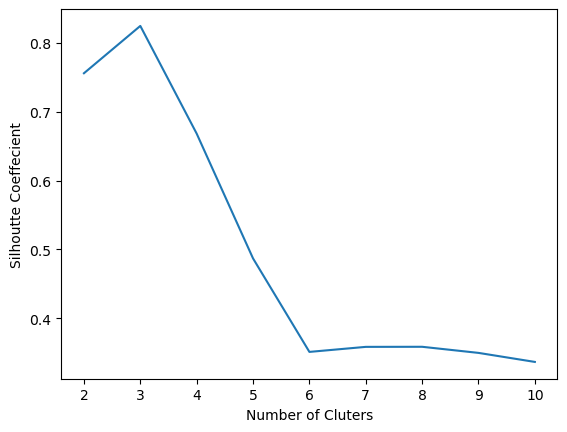

In [36]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()